## 5. 이산형 확률변수
### - 1차원 이산형 확률변수
### - 2차원 이산형 확률변수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

#### 1차원 이산형 확률변수
* 1차원 이산형 확률변수의 정의
  - 확률질량함수(probability mass function, PMF) = 확률함수
    +  이산 확률 변수에서 특정 값에 대한 확률을 나타내는 함수 (연속 확률 변수에서의 확률 밀도 함수와 대응)
  - 확률변수가 취할 수 있는 값과 그 확률의 구체적인 대응 = 확률분포(probability distribution)
  - 확률의 성질
    + 확률은 절대적으로 0이상, 모든 확률을 더하면 1이 됨
  - 누적분포함수(= 분포함수)
    + 확률변수 X가 x이하가 될 때의 확률을 반환하는 함수
  - 확률변수의 변환
    + 확률변수 X에 2를 곱하고 3을 더한 2X+3과 같은 것
    + 확률변수를 표준화(평균을 빼고 표준편차로 나누는 과정)할 때 중요한 연산
    + 그렇다면 변환을 수행한 2X+3은 확률변수? 확률변수라면 확률분포는?
      * 이 또한 확률변수(ex. 주사위)
* 1차원 이산형 확률변수의 지표
  - 확률변수의 평균이란 확률변수를 몇 번이나 (무제한으로) 시행하여 얻어진 실현값의 평균
  - 기댓값 = 확률변수의 평균
  - 확률변수의 분산 -> 데이터의 분산과 마찬가지로 산포도를 나타내는 지표

#### 2차원 이산형 확률변수
* 2차원 이산형 확률변수의 정의
  - 결합확률분포 = 결합분포
    + 2차원 확률분포 -> X,Y를 동시에 다룸
    + 결합확률분포 -> 확률변수 (X,Y)의 움직임을 동시에 고려한 분포
    + ex. X -> A주사위 눈 + B주사위 눈, Y -> A주사위 눈
  - 2차원 확률분포의 확률 -> x,y를 인수로 취하는 함수 => 결합확률함수(joint probability function)
  - 확률의 성질
    + 1차원의 경우와 같음
  - 주변확률분포
    + 개별 확률변수에만 흥미가 있을 수도 있음
    + ex. 확률변수 X의 확률함수를 알고 싶으면...
    + 결합확률함수에서 Y의 영향을 제거하면 확률변수 X 움직임을 나타내는 확률변수 X의 확률함수만 남음
    + 이와 같이 구한 것을 주변확률분포(marginal pobability distribution)(=주변분포)라 함
* 2차원 이산형 확률변수의 지표
  - 기댓값, 분산, 공분산, 상관계수
  - 기댓값: 1차원의 경우와 거의 같음
  - 분산: 1차원의 경우와 거의 같음
  - 공분산: 2개의 확률변수 사이에 어느 정도 상관이 있는지 알 수 있음
  - 상관계수: 데이터의 상관계수와 마찬가지로 공분산을 각각의 표준편차로 나누어서 구함

In [2]:
x_set = np.array([1,2,3,4,5,6])

In [3]:
# x_set에 대응하는 확률은 앞서 활용한 불공정한 주사위의 확률분포를 따른다고 가정
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [4]:
# 확률분포에 의해 확률변수 X의 동작이 결정 -> X는 x_set와 f를 요소로 하는 리스트로 구현
X = [x_set, f]

In [5]:
# 확률 p_k를 구함
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

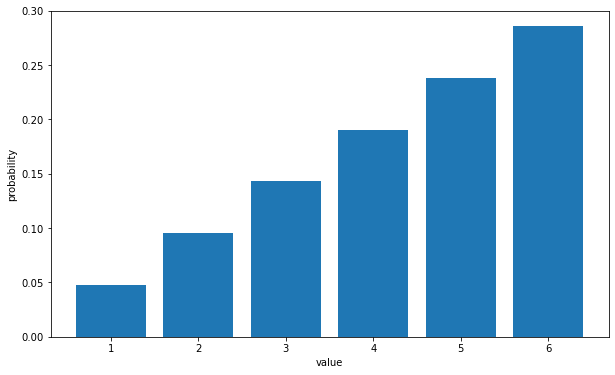

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

In [7]:
# 확률이 모두 0이상? -> np.all()로 확인
np.all(prob>=0)

True

In [8]:
# 확률의 총합이 1? -> np.sum()로 확인
np.sum(prob)

0.9999999999999999

In [9]:
# 누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [10]:
# 눈이 3이하가 되는 확률
F(3)

0.2857142857142857

In [11]:
# 확률변수의 변환 Y
y_set = np.array([2*x_k+3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [12]:
# 기댓값1
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [13]:
# 기댓값2 -> 무제한 시행 (100만번 시행)
sample = np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

4.334207

##### 이산형 확률변수의 기댓값

$E(g(X)) = \sum{g(x_k)*f(x_k)}$

In [14]:
# 이산형 확률변수의 기댓값
def E(X, g=lambda x: x):
    x_set, f=X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

In [15]:
E(X) # g에 아무것도 지정하지 않으면 확률변수 X의 기댓값이 구해짐

4.333333333333333

In [16]:
# Y=2X+3의 기댓값
E(X, g=lambda x: 2*x+3)

11.666666666666664

##### 기댓값의 선형성

$E(aX+b) = aE(X)+b$

* 여기서 a,b를 실수, X는 확률변수

In [17]:
# E(2X+3) = 2E(X)+3 ?
2 * E(X) +3

11.666666666666666

In [18]:
# 불공정한 주사위의 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

##### 이산형 확률변수의 분산

$V(g(X)) = \sum{(g(x_k) - E(g(X)))^2f(x_k)}$

In [19]:
# 이산형 확률변수의 분산
def V(X, g=lambda x: x):
    x_set, f=X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

In [20]:
V(X) # g를 지정하지 않으면 확률변수 X의 분산을 계산

2.2222222222222223

In [21]:
V(X, lambda x: 2*x+3)

8.88888888888889

##### 분산의 공식
$V(aX+b) = a^2V(X)$
* 여기서 a,b를 실수, X는 확률변수

In [22]:
# V(2X+3) = 2^2V(X) ?
2**2*V(X)

8.88888888888889

In [23]:
# 2차원 이산형 확률변수
# ex. X -> A주사위 눈 + B주사위 눈, Y -> A주사위 눈
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [24]:
def f_XY(x,y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y * (x-y) / 4411
    else:
        return 0

In [25]:
# 확률변수 (X,Y)의 움직임은 x_set, y_set, f_xy에 의해 정의되므로 리스트로 XY라고 정의
XY = [x_set,y_set,f_XY]

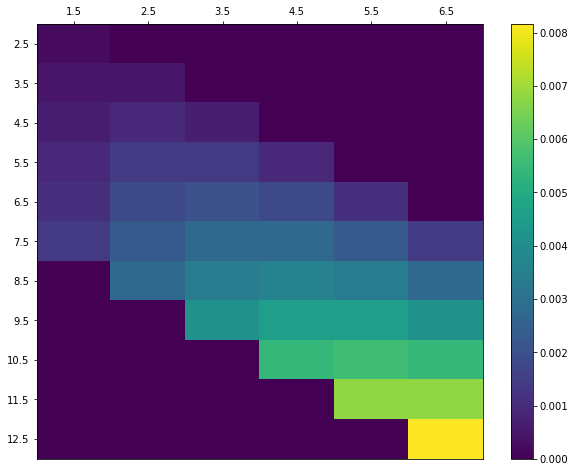

In [26]:
# 확률분포 히트맵으로 나타내기
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set]
                for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7) + 0.5, minor=False)
ax.set_yticklabels(np.arange(2,13) + 0.5, minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래 역전
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show()

In [27]:
# 확률의 성질 만족?
np.all(prob >= 0), np.sum(prob)

(True, 0.09997732940376332)

In [28]:
# 주변분포1
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [29]:
# 주변분포2
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [30]:
# X와 Y는 각각 독립
X = [x_set,f_X]
Y = [y_set,f_Y]

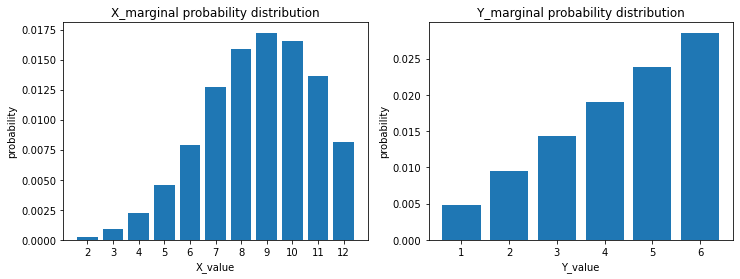

In [31]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [32]:
# 2차원 이산형 확률변수의 기댓값
np.sum([x_i*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

0.8664701881659488

##### g(X,Y)의 기댓값
$E(g(X,Y)) = \sum_i{\sum_j{g(x_i,y_j)f_XY(x_i,y_j)}}$

In [33]:
def E(XY,g):
    x_set,y_set,f_Xy = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

In [34]:
mean_X = E(XY, lambda x,y: x)
mean_X

0.8664701881659488

In [35]:
mean_Y = E(XY, lambda x,y: y)
mean_Y

0.4332350940829744

##### 기댓값의 선형성
$E(aX+bY) = aE(X) + bE(Y)$

In [36]:
# 선형성 확인
a,b=2,3

In [37]:
E(XY, lambda x,y: a*x + b*y)

3.0326456585808206

In [38]:
a * mean_X + b * mean_Y

3.0326456585808206

In [39]:
# 2차원 이산형 확률변수의 분산
np.sum([(x_i - mean_X)**2 * f_XY(x_i,y_j)
      for x_i in x_set for y_j in y_set])

6.527270847997692

##### g(X,Y)의 분산
$V(g(X,Y)) = \sum_i{\sum_j{(g(x_i,y_j) - E(g(X,Y)))^2f_XY(x_i,y_j)}}$

In [40]:
def V(XY,g):
    x_set,y_set,f_XY = XY
    mean = E(XY,g)
    return np.sum([(g(x_i,y_j)-mean)**2 * f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

In [41]:
var_X = V(XY, g=lambda x,y:x)
var_X

6.527270847997692

In [42]:
var_Y = V(XY, g=lambda x,y:y)
var_Y

1.74290363355916

In [43]:
# 공분산
def Cov(XY):
    x_set,y_set,f_XY = XY
    mean_X = E(XY, lambda x,y:x)
    mean_Y = E(XY, lambda x,y:y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

In [44]:
cov_xy = Cov(XY)
cov_xy

3.263635423998846

##### 분산과 공분산의 공식
$V(aX+bY) = a^2V(X) + b^2V(Y) + 2abCov(X,Y)$
* 여기서 a,b를 실수, X는 확률변수

In [45]:
# V(2X+3Y) = 4V(X) + 9V(Y) + 12Cov(X,Y) ?
V(XY, lambda x,y: a*x + b*y)

80.95884118200935

In [46]:
a**2 * var_X + b**2 * var_Y + 2*a*b*cov_xy

80.95884118200937

In [47]:
# 상관계수
cov_xy / np.sqrt(var_X * var_Y)

0.9676072944717294